# Chapter 1
Notebook by Jim Arnold

## Introduction
Following examples from https://www.nltk.org/book/ch01.html

## Getting Started with NLTK

In [6]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Download "all" ... 

Load book data:

In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [7]:
text1

<Text: Moby Dick by Herman Melville 1851>

### Searching Text
There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing  "monstrous" in parentheses:

In [8]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [9]:
text2.concordance('affection')

Displaying 25 of 79 matches:
, however , and , as a mark of his affection for the three girls , he left them
t . It was very well known that no affection was ever supposed to exist between
deration of politeness or maternal affection on the side of the former , the tw
d the suspicion -- the hope of his affection for me may warrant , without impru
hich forbade the indulgence of his affection . She knew that his mother neither
rd she gave one with still greater affection . Though her late conversation wit
 can never hope to feel or inspire affection again , and if her home be uncomfo
m of the sense , elegance , mutual affection , and domestic comfort of the fami
, and which recommended him to her affection beyond every thing else . His soci
ween the parties might forward the affection of Mr . Willoughby , an equally st
 the most pointed assurance of her affection . Elinor could not be surprised at
he natural consequence of a strong affection in a young and ardent mind . This 
 opinion . 

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the *___ pictures* and *a ___ size*. 

What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [10]:
# in Moby Dick
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [11]:
# in Sense and Sensibility
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [12]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


In [25]:
# let's compare usage of God in the book of genesis text3 and monty python text6...
print('Genesis...')
print(text3.similar('God'))
print("")
print('Monty Python...')
print(text6.similar('God'))
print("")

Genesis...
he joseph pharaoh jacob they abraham she isaac sarah them him it i me
abram laban thee cain esau judah
None

Monty Python...
the coconut bristol
None



In [26]:
# let's see what God and coconut hvae in common
text6.common_contexts(["God", "coconut"])

of_and


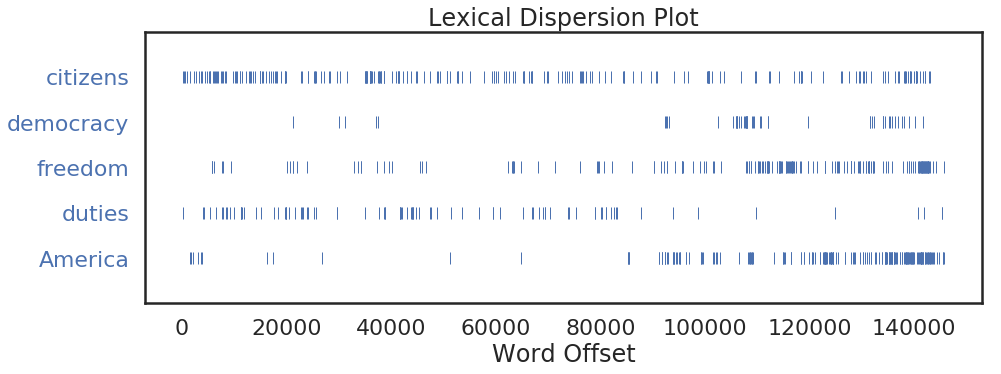

In [46]:
# plot relative location of a word in a text
plt.figure(figsize=(15,5))
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

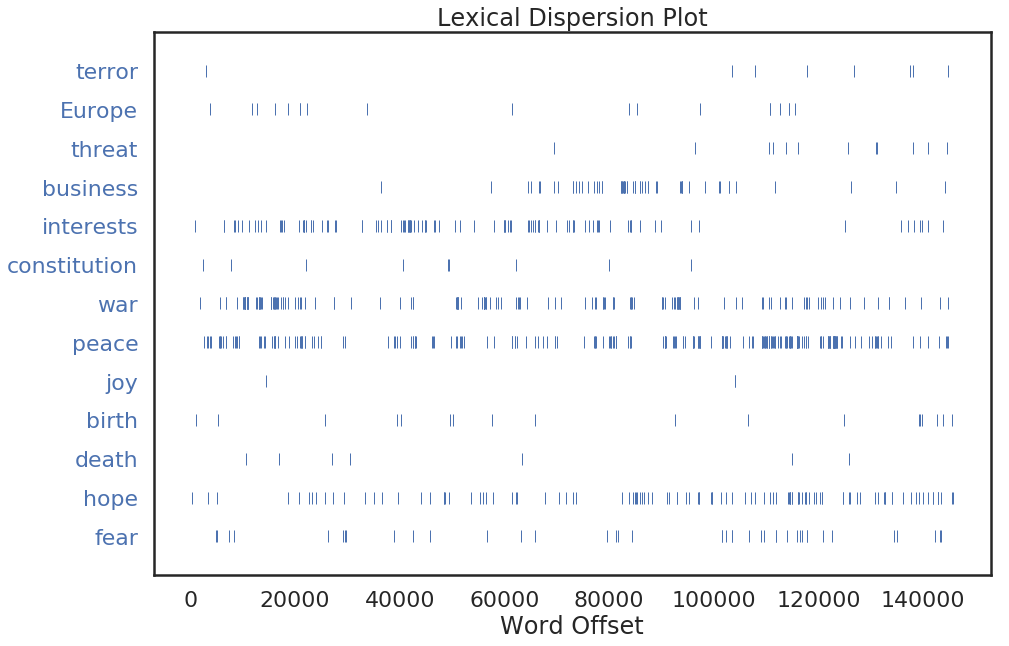

In [47]:
# plot relative location of a word in a text
plt.figure(figsize=(15,10))
text4.dispersion_plot(["terror", "Europe", "threat",
                       "business", "interests", "constitution", 
                       "war", "peace",
                       "joy", "birth", "death", 
                       "hope", "fear"])

### Counting Vocabulary

The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis:

In [50]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? 

To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. 

In Python we can obtain the vocabulary items of text3 with the command: set(text3). When you do this, many screens of words will fly past. Now try the following:

In [52]:
st3 = sorted(set(text3))
len(st3)

2789

By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average (remember if you're using Python 2, to start with from __future__ import division).

In [53]:
# lexical richness
len(st3) / len(text3)

0.06230453042623537

In [54]:
# average token frequency
len(text3) / len(st3) 

16.050197203298673

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [74]:
wordList = ['smote', 'Lord', 'God', 'a']
print("Word count in Book of Genesis:")
for word in wordList:
    print("%s: %d" % (word, text3.count(word))) 

Word count in Book of Genesis:
smote: 5.000000
Lord: 0.000000
God: 231.000000
a: 342.000000


In [76]:
# define functions for lexical diversity
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(word, text):
    return 100 * text.count(word) / len(text)

In [77]:
print("Percentage of word count in Book of Genesis:")
for word in wordList:
    print("%s: %f" % (word, percentage(word,text3)))

Percentage of word count in Book of Genesis:
smote: 0.011170
Lord: 0.000000
God: 0.516040
a: 0.764007


In [80]:
# generate dict of word counts for each word in text
wordCount = {word:text3.count(word) for word in sorted(set(text3))}

In [82]:
len(wordCount)

2789

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# get top 10 most common tokens in the book of genesis
wordCount = pd.Series(wordCount)
wordCount.sort_values(ascending=False).head(10)

,      3681
and    2428
the    2411
of     1358
.      1315
And    1250
his     651
he      648
to      611
;       605
dtype: int64

,      3681
and    2428
the    2411
of     1358
.      1315
dtype: int64

### Variables

In [95]:
len(text1)

260819

In [96]:
text1[0:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [98]:
vocab = set(text1)
vocab_size = len(vocab)
print(vocab_size)

19317


### Strings

In [101]:
# example
name = 'Monty'
print("Given: ")
print("name = 'Monty'")
print("name[0] = %s" % name[0])
print("name[:4] = %s" % name[:4])

Given: 
name = 'Monty'
name[0] = M
name[:4] = Mont


In [102]:
# join strings from list
' '.join(['Monty', 'Python'])

'Monty Python'

In [103]:
# split string into list
'Monty Python'.split()

['Monty', 'Python']

## Computing with Language: Simple Statistics

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. 

In [108]:
saying = ['After', 'all', 'is', 'said', 'and',
          'done', 'more', 'is', 'said', 'than', 'done']
# whole thing
print(sorted(set(saying)))
# last 2
print(sorted(set(saying))[-2:])

['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']
['said', 'than']


### Frequency Distributions

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book. One method would be to keep a tally for each vocabulary item, like that shown in 3.1. The tally would need thousands of rows, and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine.

A **frequency distribution** tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a  FreqDist to find the 50 most frequent words of Moby Dick:

In [112]:
fdist1 = FreqDist(text1)
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

Note: I did this similar thing using a dict comprehension above. Good to know that it's built-in with nltk.

In [113]:
fdist1['whale']

906

When we first invoke FreqDist, we pass the name of the text as an argument [1]. We can inspect the total number of words ("outcomes") that have been counted up [2] — 260,819 in the case of Moby Dick. The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text [3].

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, whale, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using fdist1.plot(50, cumulative=True), to produce the graph in 3.2. These 50 words account for nearly half the book!

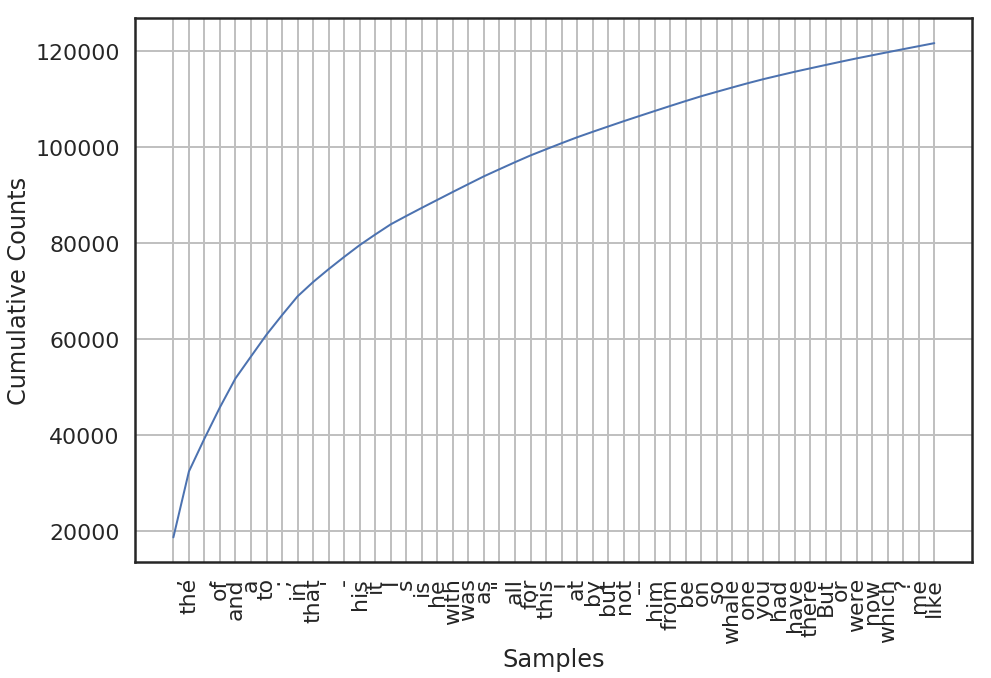

In [115]:
plt.figure(figsize=(15,10))
fdist1.plot(50, cumulative=True)

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing fdist1.hapaxes(). This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

In [119]:
# get first 10 hapaxes
fdist1.hapaxes()[:10]

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly']

### Fine-grained Selection of Words

Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property P, so that P(w) is true if and only if w is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all w such that w is an element of V (the vocabulary) and w has property P".

In [121]:
long_words = [w for w in set(text1) if w.startswith('a')]
sorted(long_words)

['a',
 'aback',
 'abaft',
 'abandon',
 'abandoned',
 'abandonedly',
 'abandonment',
 'abased',
 'abasement',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abbreviate',
 'abbreviation',
 'abeam',
 'abed',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhorring',
 'abide',
 'abided',
 'abiding',
 'ability',
 'abjectly',
 'able',
 'ablutions',
 'aboard',
 'abode',
 'abominable',
 'abominate',
 'abominated',
 'abomination',
 'aboriginal',
 'aboriginally',
 'aboriginalness',
 'abortion',
 'abortions',
 'abound',
 'abounded',
 'abounding',
 'aboundingly',
 'about',
 'above',
 'abreast',
 'abridged',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'absorbingly',
 'abstained',
 'abstemious',
 'abstinence',
 'abstract',
 'abstracted',
 'abstraction',
 'absurd',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'accelerate',
 'accelerated',
 'accelerating',
 'accept',
 'accessible',
 'accessory',
 'accident',
 'accidental'

For each word w in the vocabulary V, we check whether len(w) is greater than 15; all other words will be ignored. We will discuss this syntax more carefully later.

In [130]:
alphabet = list('abcdefghijklmnopqrstuzwxyz')

In [136]:
# generate dict of alphabet and # of words in the text beginning with each letter 
wordCount = {letter:len([w for w in set(text1) if w.startswith(letter)]) for letter in alphabet}

In [137]:
# number of words in Moby Dick starting with each letter of the alphabet: 

{'a': 860,
 'b': 927,
 'c': 1463,
 'd': 903,
 'e': 644,
 'f': 757,
 'g': 469,
 'h': 603,
 'i': 698,
 'j': 133,
 'k': 100,
 'l': 521,
 'm': 726,
 'n': 225,
 'o': 360,
 'p': 1187,
 'q': 73,
 'r': 791,
 's': 1959,
 't': 787,
 'u': 504,
 'z': 10,
 'w': 557,
 'x': 0,
 'y': 49}

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. 

Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. 

This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). 

Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [138]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']